# Importing Libraries

In [12]:
import cv2
import os
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [13]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid_with_samples',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 18345 files belonging to 10 classes.
['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


# Loading Model

In [26]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

#Visualising and Performing Prediction on Single image

## Testing Model

In [ ]:
#Test Image manual input

image_path = 'test/test/AppleCedarRust1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

# Take input

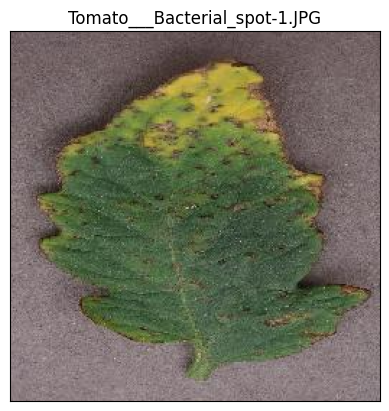

In [63]:
# auto random input from test folder

folder_path = 'TestImages'
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
random_image = random.choice(image_files)
image_path = os.path.join(folder_path, random_image)
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

# Display the image
plt.imshow(img)
plt.title(random_image)
plt.xticks([])
plt.yticks([])
plt.show()


# Run the model

In [64]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


# Output 

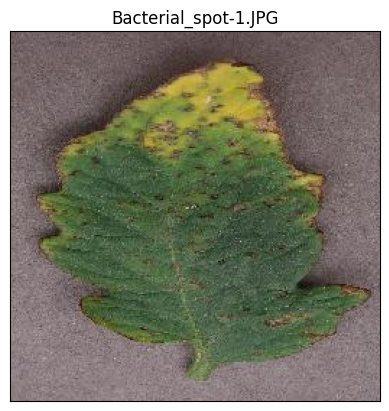

Bacterial_spot: 99.88%
Septoria_leaf_spot: 0.11%
Target_Spot: 0.01%
Early_blight: 0.0%
Late_blight: 0.0%
Leaf_Mold: 0.0%
Spider_mites Two-spotted_spider_mite: 0.0%
Tomato_Yellow_Leaf_Curl_Virus: 0.0%
Tomato_mosaic_virus: 0.0%
healthy: 0.0%


In [65]:
# Get class percentages
class_percentages = {class_name[i]: round(predictions[i] * 100, 2) for i in range(len(predictions))}

#Display image
plt.imshow(img)
plt.title(random_image.split("___")[1])
plt.xticks([])
plt.yticks([])
plt.show()


# Sort the class percentages dictionary by values in descending order
sorted_class_percentages = {k: v for k, v in sorted(class_percentages.items(), key=lambda item: item[1], reverse=True)}

# Display the percentage for each class in sorted order
for class_, percentage in sorted_class_percentages.items():
    class_name_short = class_.split("___")[1]  # Get the part of class name after "Tomato___"
    print(f"{class_name_short}: {percentage}%")


# Display the disease prediction
result_index = np.argmax(predictions)
model_prediction = class_name[result_index]
